<a href="https://colab.research.google.com/github/andrewkallai/MLTSA25_AKallai/blob/main/HW7/autoencoder_time_series_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder for time series
an autoencoder is a deep neural network that reproduces input data

it does so by progressively shrinking the size of the layers from the input size to a bottle neck and then expanding them back progressively to the initial size

note: the input and target are the same!

put your imports in the top cell

In [ ]:
!pip install PyGithub
!pip install pydub

import pandas as pd
import numpy as np
import glob
import pylab as pl
from PIL import Image
from github import Github
import sys
import os
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%pylab inline

#Deep leaarning imports
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint



from google.colab import drive

drive.mount("/content/gdrive")

Populating the interactive namespace from numpy and matplotlib
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


get the data by cloaning the repo https://github.com/nlandolfi/acc2022treelinearcascades_stocks.git

In [ ]:
!git clone https://github.com/nlandolfi/acc2022treelinearcascades_stocks

fatal: destination path 'acc2022treelinearcascades_stocks' already exists and is not an empty directory.


In [ ]:
ls

acc2022treelinearcascades_stocks/  gdrive/  sample_data/


In [ ]:
ls acc2022treelinearcascades_stocks/data

aapl.csv  cat.csv   dis.csv  ibm.csv   ko.csv   msft.csv  unh.csv  wmt.csv
amgn.csv  crm.csv   gs.csv   intc.csv  mcd.csv  nke.csv   v.csv
axp.csv   csco.csv  hd.csv   jnj.csv   mmm.csv  pg.csv    vz.csv
ba.csv    cvx.csv   hon.csv  jpm.csv   mrk.csv  trv.csv   wba.csv


check that all files have the same length. The system command `wc -l returns` the  number of lines (stands for "word count -lines")

In [ ]:
!wc -l acc2022treelinearcascades_stocks/data/*

   2516 acc2022treelinearcascades_stocks/data/aapl.csv
   2516 acc2022treelinearcascades_stocks/data/amgn.csv
   2516 acc2022treelinearcascades_stocks/data/axp.csv
   2516 acc2022treelinearcascades_stocks/data/ba.csv
   2516 acc2022treelinearcascades_stocks/data/cat.csv
   2516 acc2022treelinearcascades_stocks/data/crm.csv
   2516 acc2022treelinearcascades_stocks/data/csco.csv
   2516 acc2022treelinearcascades_stocks/data/cvx.csv
   2516 acc2022treelinearcascades_stocks/data/dis.csv
   2516 acc2022treelinearcascades_stocks/data/gs.csv
   2516 acc2022treelinearcascades_stocks/data/hd.csv
   2516 acc2022treelinearcascades_stocks/data/hon.csv
   2516 acc2022treelinearcascades_stocks/data/ibm.csv
   2516 acc2022treelinearcascades_stocks/data/intc.csv
   2516 acc2022treelinearcascades_stocks/data/jnj.csv
   2516 acc2022treelinearcascades_stocks/data/jpm.csv
   2516 acc2022treelinearcascades_stocks/data/ko.csv
   2516 acc2022treelinearcascades_stocks/data/mcd.csv
   2516 acc2022treelinearcas

In [ ]:
!rm acc2022treelinearcascades_stocks/data/dow.csv

rm: cannot remove 'acc2022treelinearcascades_stocks/data/dow.csv': No such file or directory


In [ ]:
#create a list of all files you want to load
files = glob.glob("acc2022treelinearcascades_stocks/data/*")

In [ ]:
files

['acc2022treelinearcascades_stocks/data/ba.csv',
 'acc2022treelinearcascades_stocks/data/wba.csv',
 'acc2022treelinearcascades_stocks/data/gs.csv',
 'acc2022treelinearcascades_stocks/data/wmt.csv',
 'acc2022treelinearcascades_stocks/data/trv.csv',
 'acc2022treelinearcascades_stocks/data/hon.csv',
 'acc2022treelinearcascades_stocks/data/jpm.csv',
 'acc2022treelinearcascades_stocks/data/unh.csv',
 'acc2022treelinearcascades_stocks/data/cat.csv',
 'acc2022treelinearcascades_stocks/data/msft.csv',
 'acc2022treelinearcascades_stocks/data/mmm.csv',
 'acc2022treelinearcascades_stocks/data/nke.csv',
 'acc2022treelinearcascades_stocks/data/pg.csv',
 'acc2022treelinearcascades_stocks/data/amgn.csv',
 'acc2022treelinearcascades_stocks/data/vz.csv',
 'acc2022treelinearcascades_stocks/data/ibm.csv',
 'acc2022treelinearcascades_stocks/data/jnj.csv',
 'acc2022treelinearcascades_stocks/data/intc.csv',
 'acc2022treelinearcascades_stocks/data/ko.csv',
 'acc2022treelinearcascades_stocks/data/aapl.csv',
 

In [ ]:
n_files = len(files)

# Get the number of data lines (excluding header) in the first file to determine array shape
with open(files[0], 'r') as f:
    header = next(f)  # skip header
    n_lines = sum(1 for _ in f)  # count remaining lines

data = np.zeros((n_files, n_lines))  # do not use hard coded numbers, use values calculated on the spot from the variables you have: the number of and shape of the files

<ipython-input-19-8f046c70d414>:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  n_lines = sum(1 for _ in f)  # count remaining lines


In [ ]:
data.shape

(29, 2516)

 read in all the data into the array

In [ ]:
# prompt: Give me python code that will read all the data into the array
min_length = 2516
for i, f in tqdm(enumerate(files), total=len(files)):
    df = np.genfromtxt(f, delimiter=',', skip_header=1)
    # Assuming the "Volume" column is at index 5 (6th column)
    # Use only the first min_length rows to ensure consistent shape
    data[i, :] = df[:min_length, 5]


100%|██████████| 29/29 [00:00<00:00, 30.40it/s]


plot the time series


First few rows of the DataFrame with ticker symbols as column names:
         aapl       amgn        axp         ba        cat        crm  \
0  14931190.0  5481645.0  3309798.0  8666144.0  1343273.0  4197103.0   
1  16273170.0  5204153.0  3734339.0  8821379.0  1180231.0  3380290.0   
2  14813940.0  6248220.0  3396306.0  8769245.0  1214508.0  2393698.0   
3  12822990.0  4119741.0  3378112.0  7802805.0  1057297.0  1957122.0   
4  11857110.0  3966202.0  3048665.0  5433952.0  1007611.0  2053225.0   

         csco        cvx        dis          gs  ...          mrk       msft  \
0  14381730.0  2888410.0  3668456.0  36684367.0  ...  112172305.0  7721250.0   
1  15451670.0  3024021.0  3163104.0  33641594.0  ...  126142797.0  7633289.0   
2  14014330.0  2489255.0  3752901.0  29299891.0  ...   88071234.0  9627426.0   
3  14257830.0  1851063.0  3327927.0  27032910.0  ...   78973273.0  4529048.0   
4  13542410.0  3058890.0  4526952.0  26491090.0  ...   78128328.0  6124286.0   

         nke    

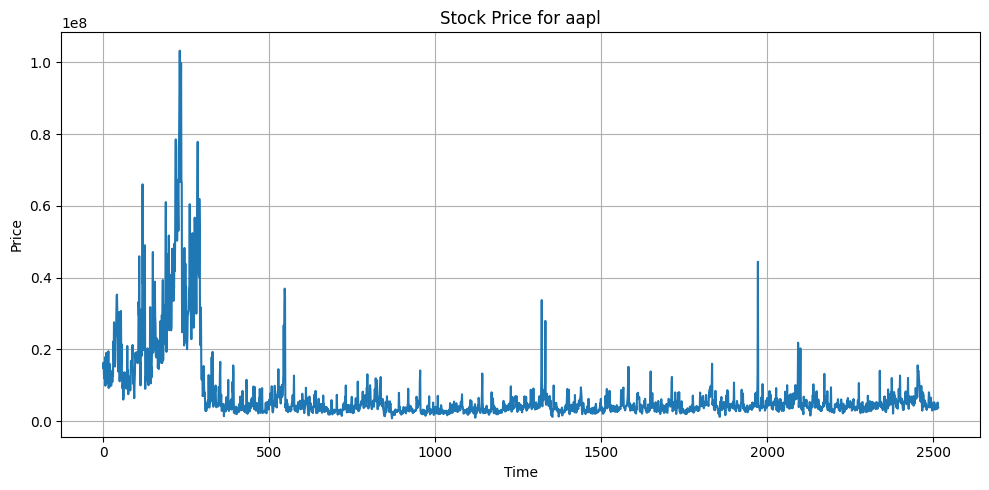

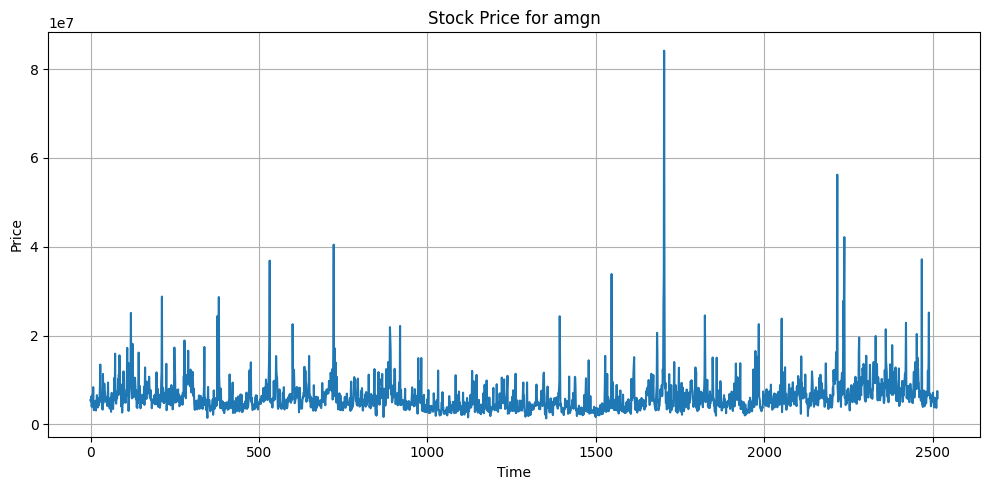

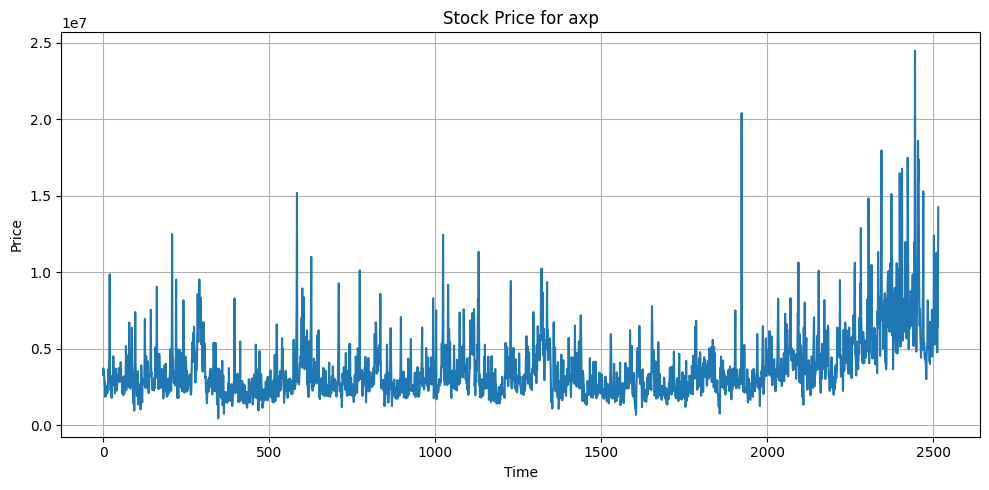

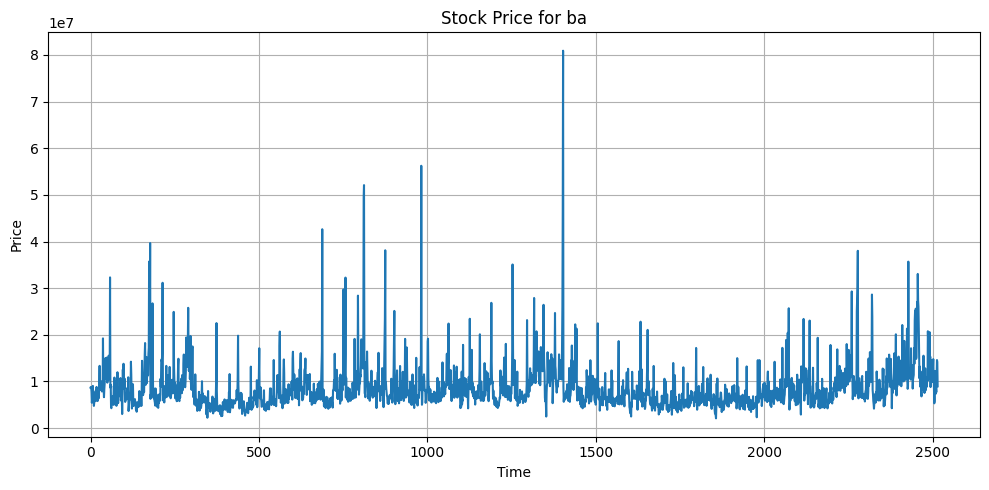

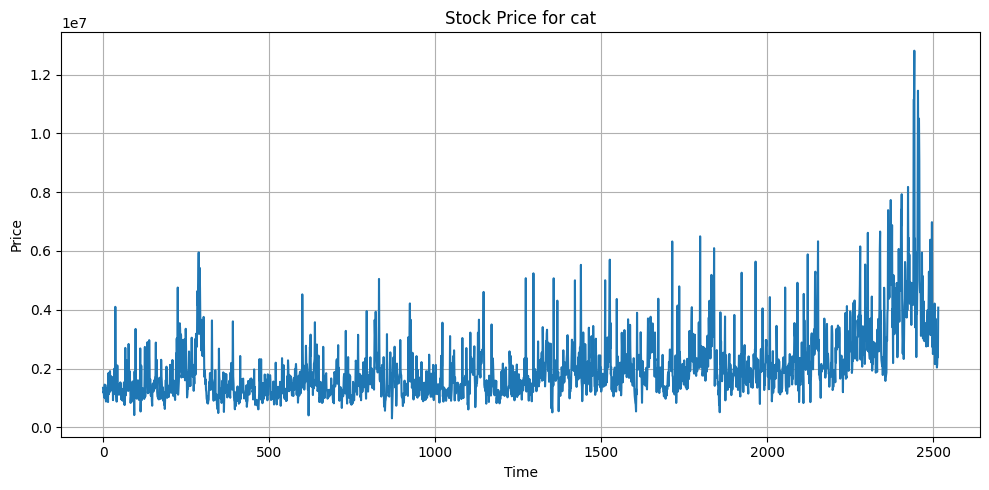

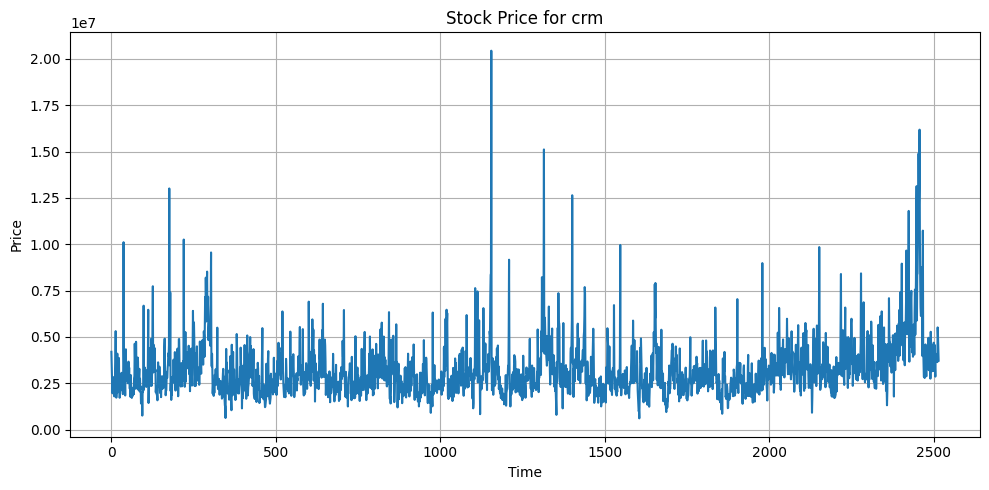

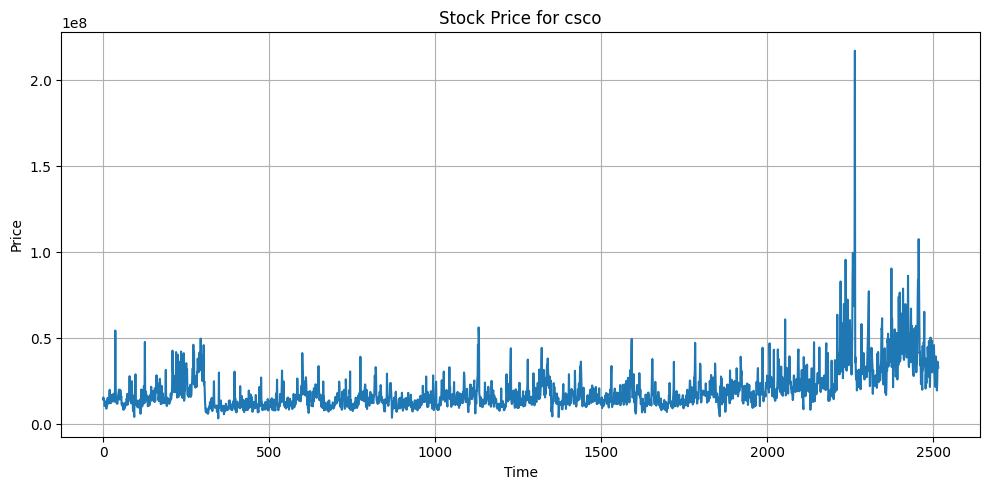

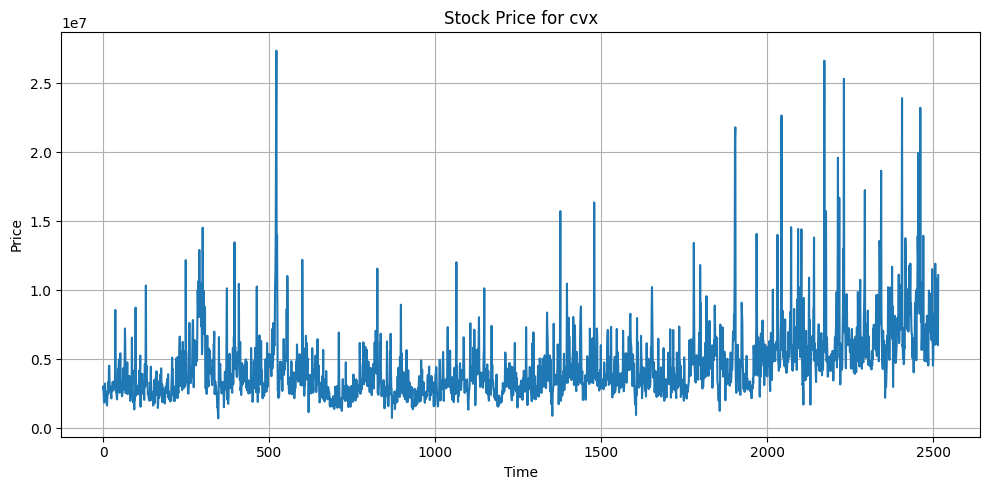

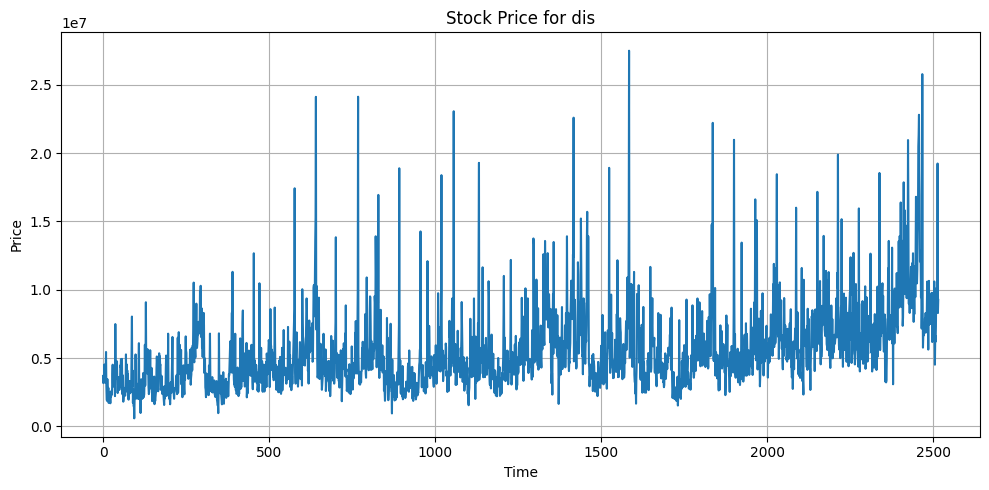

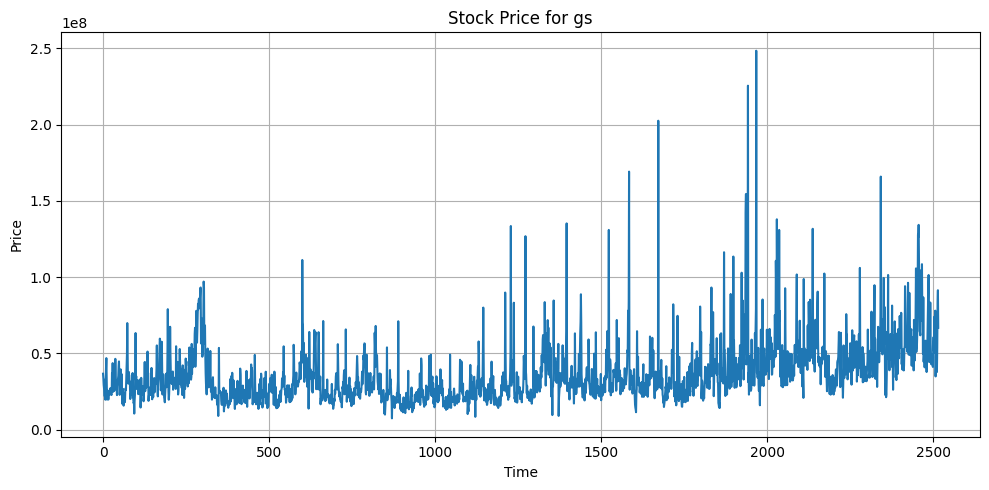

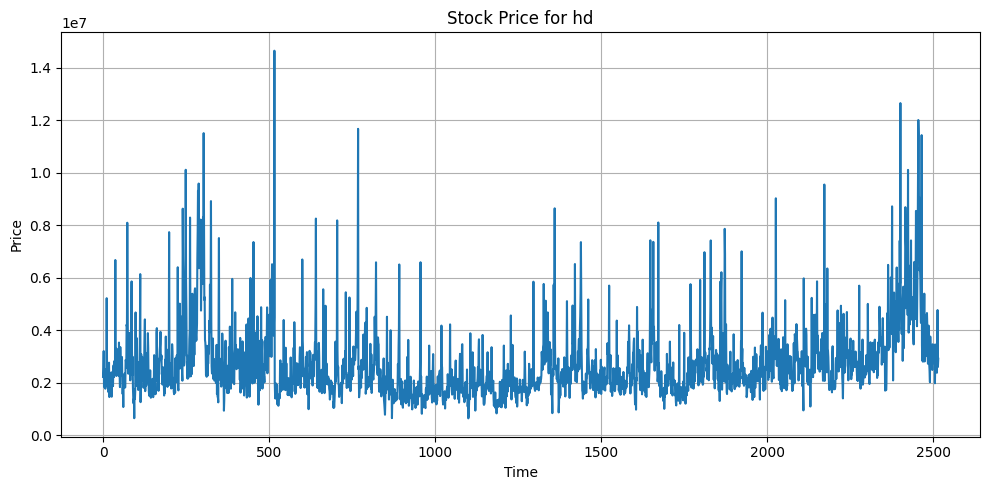

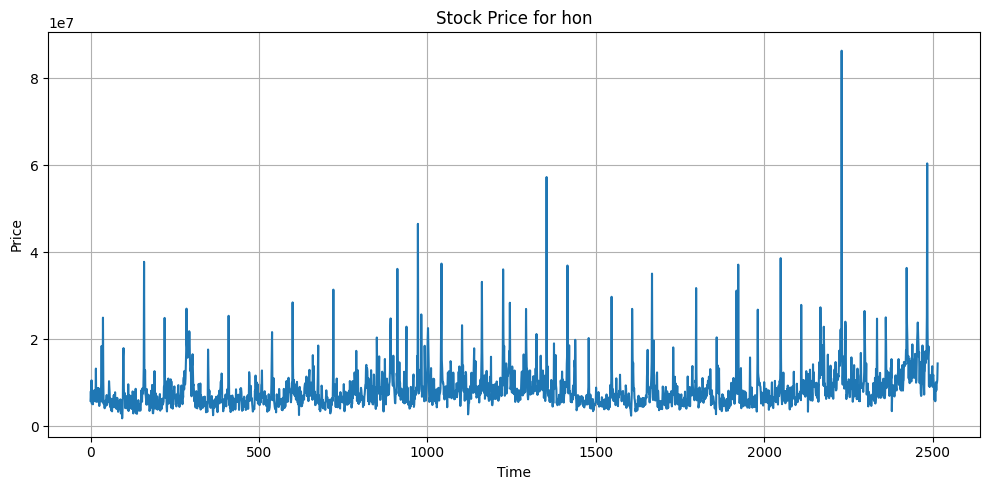

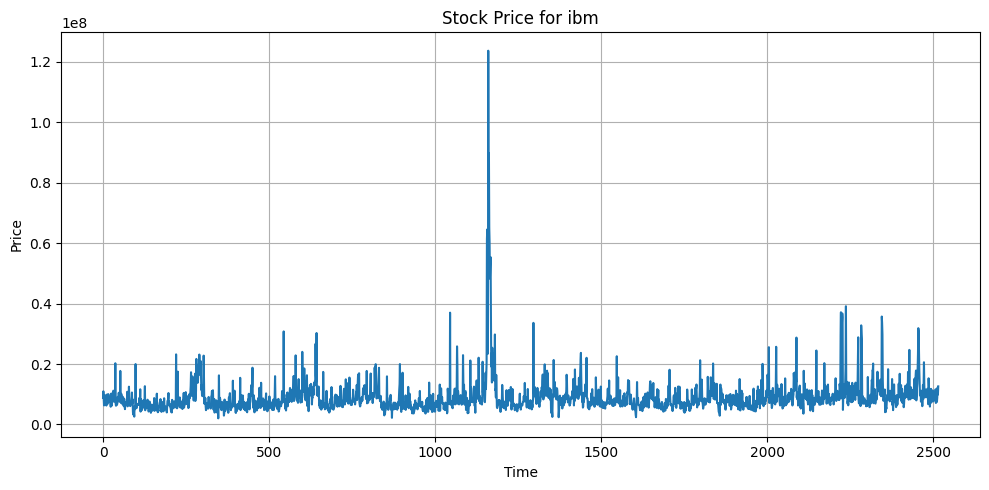

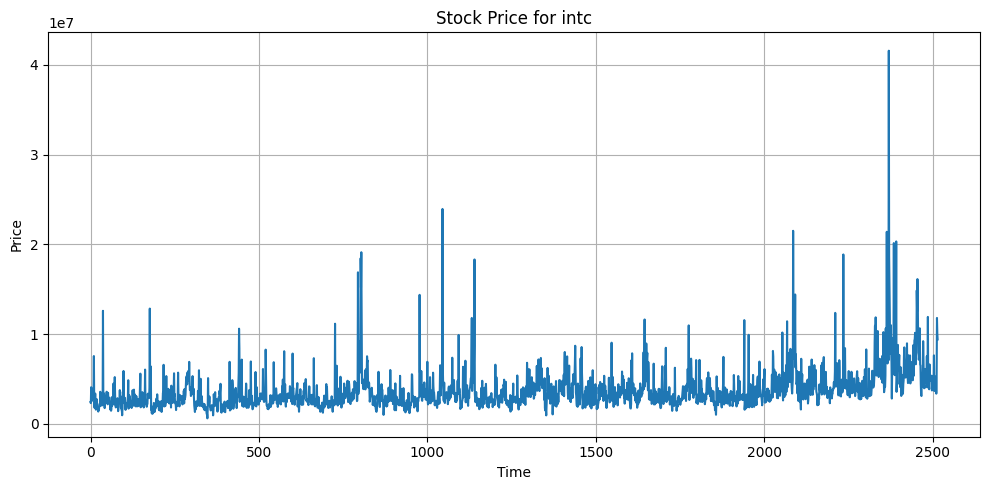

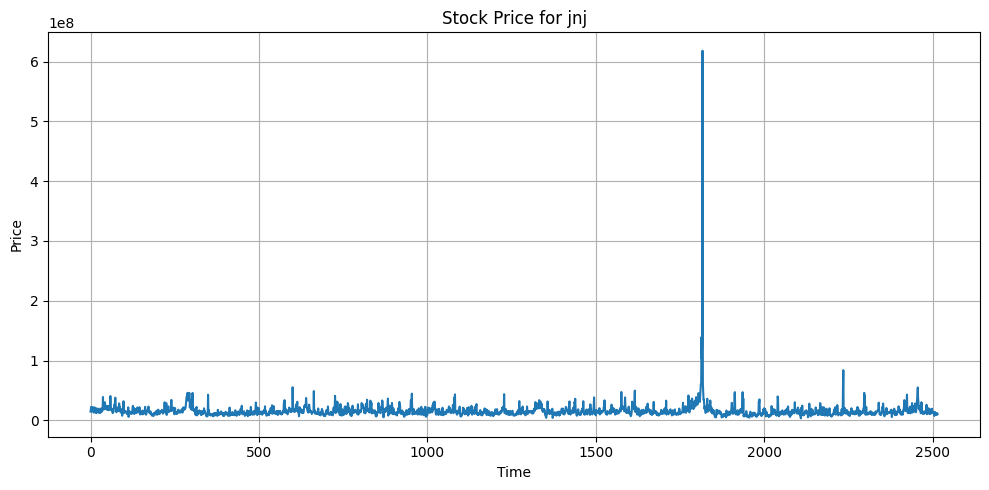

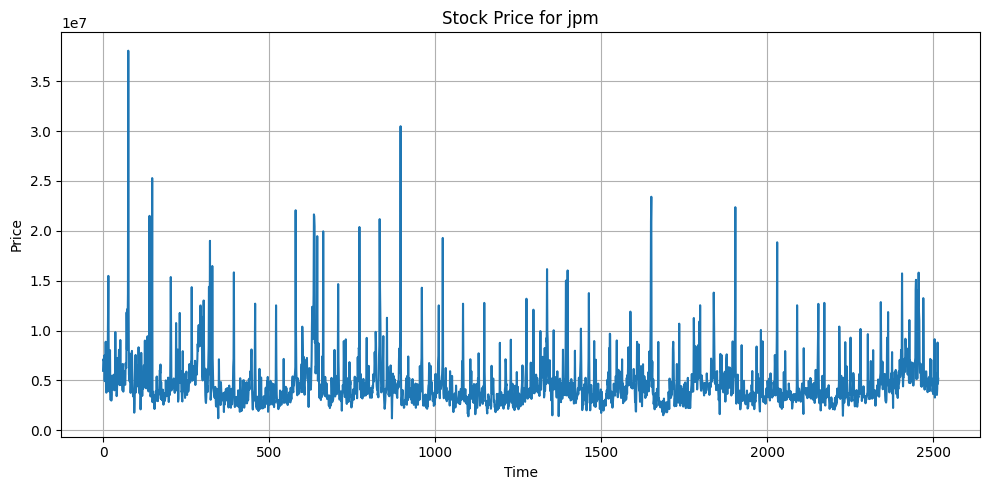

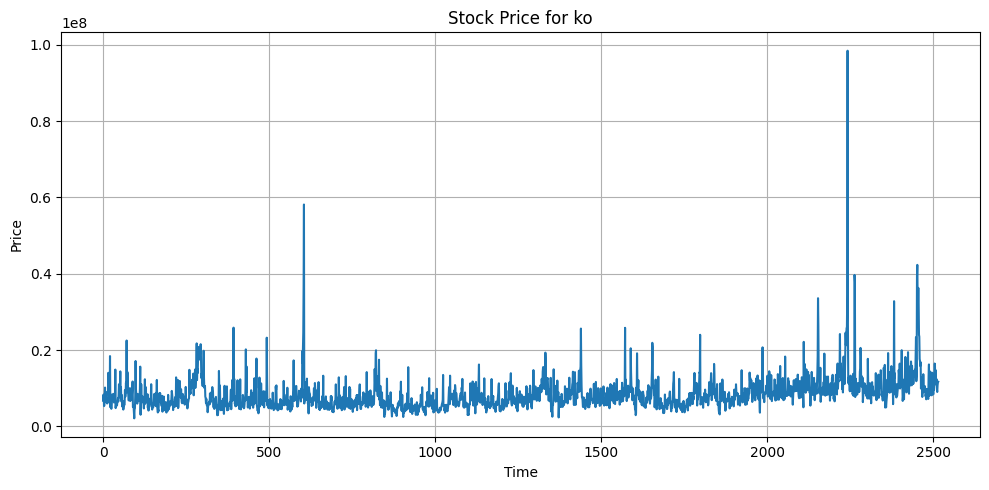

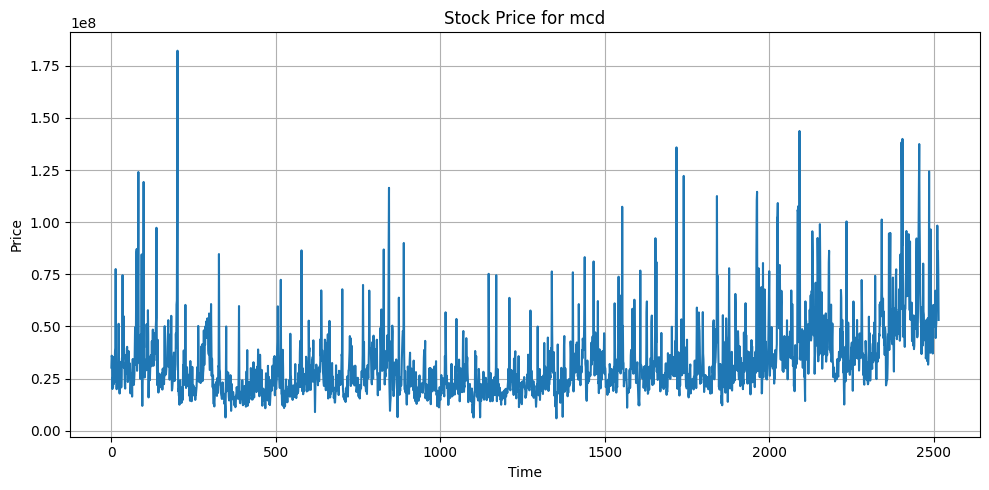

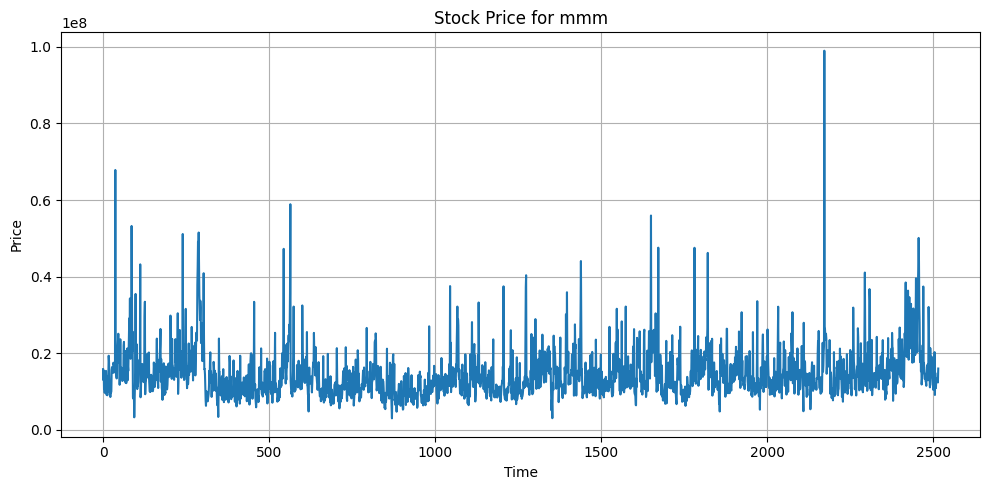

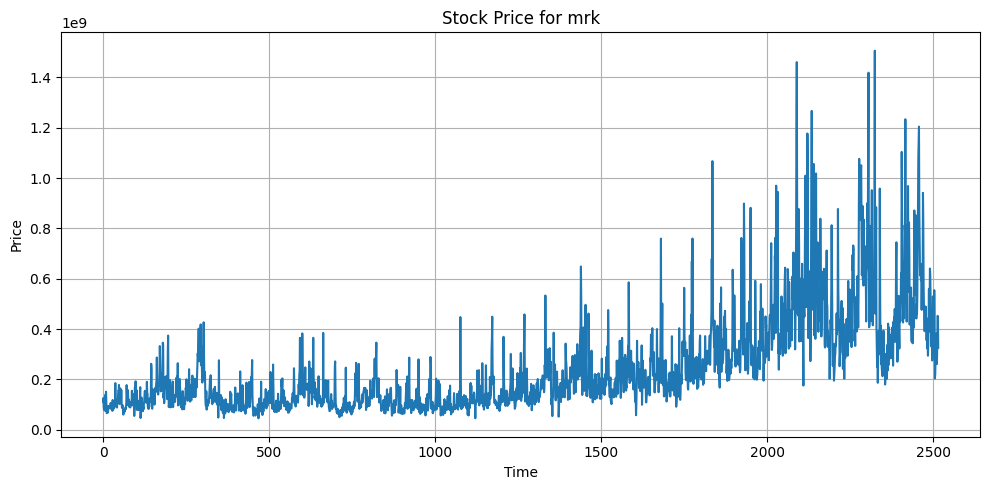

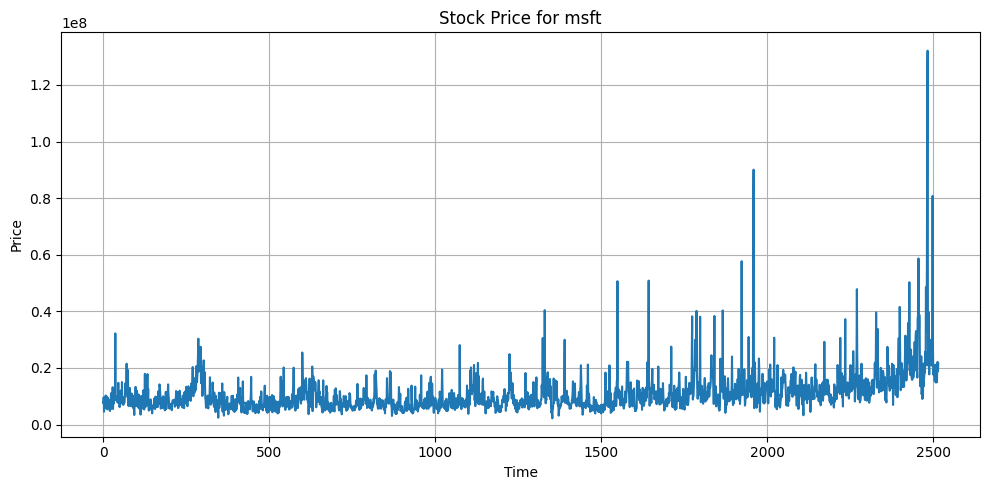

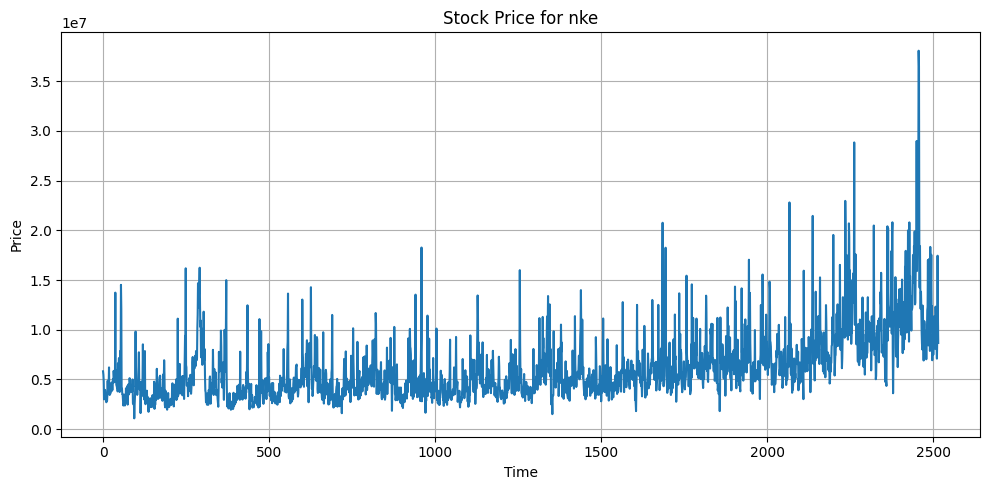

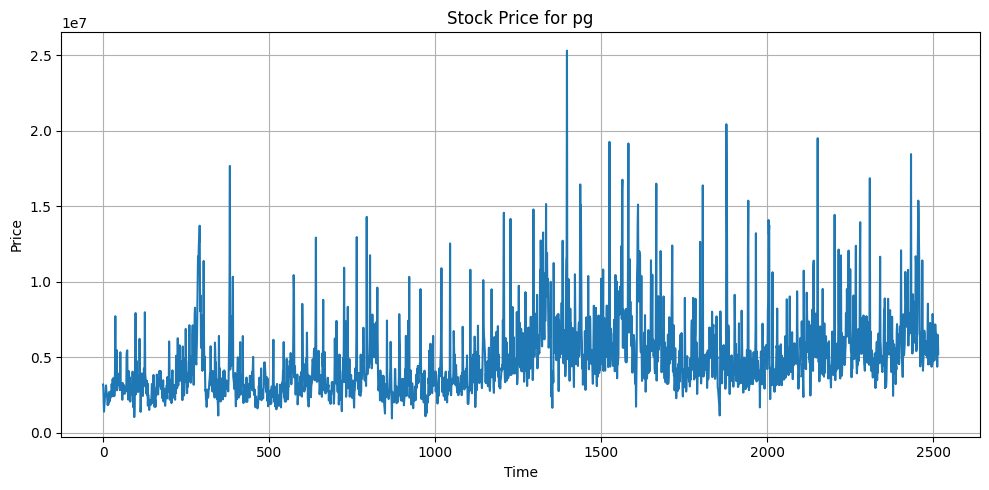

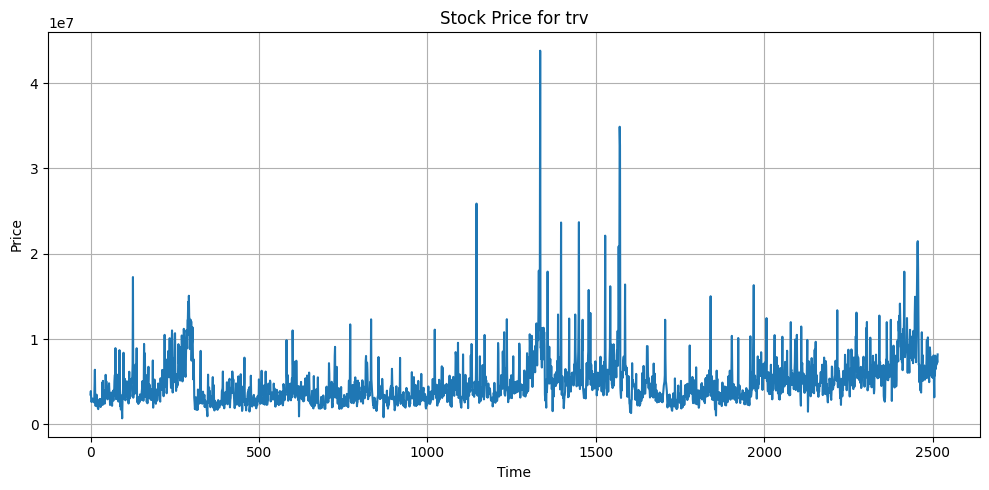

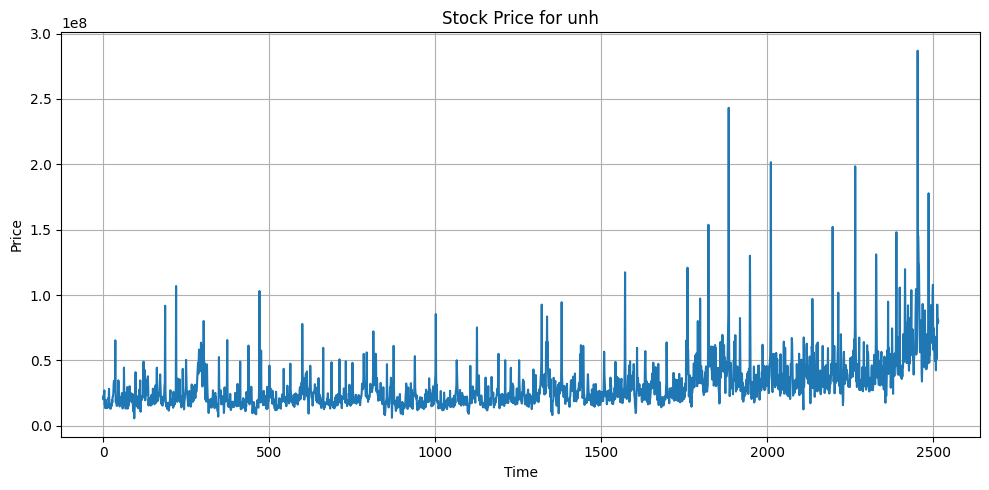

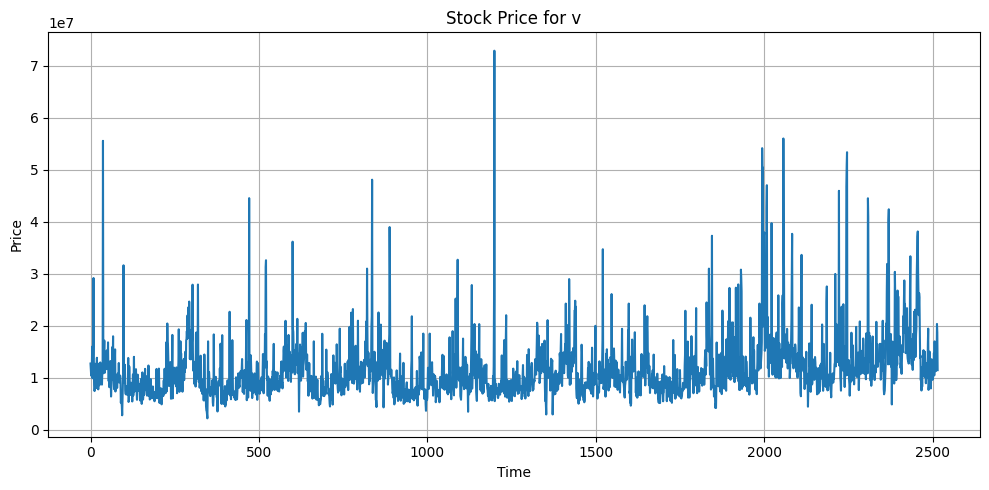

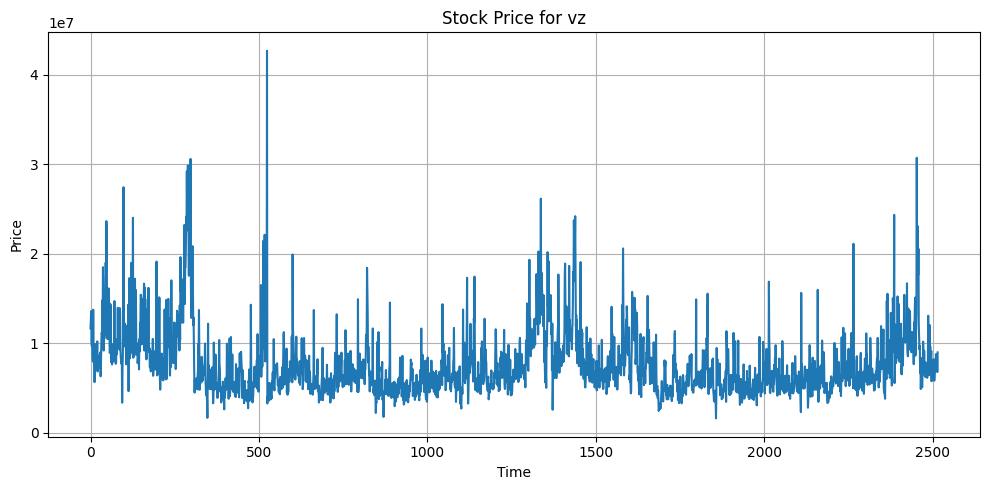

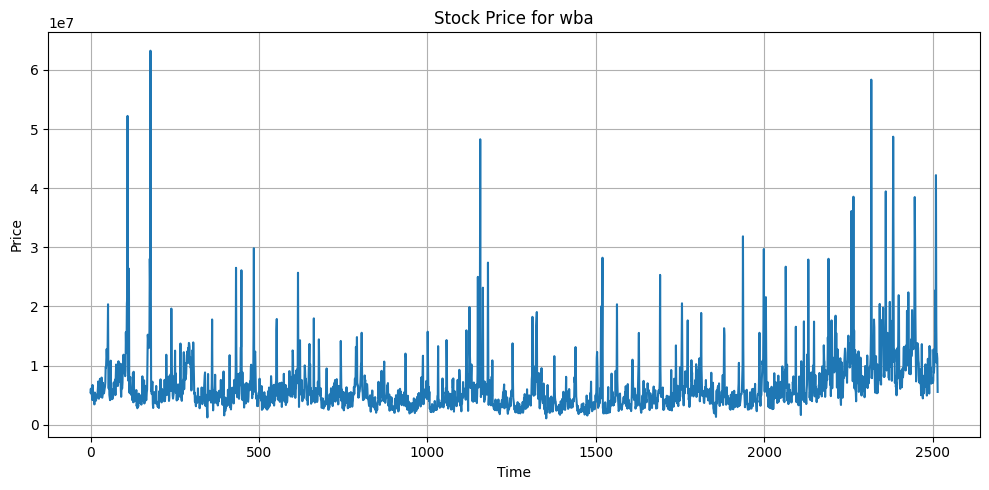

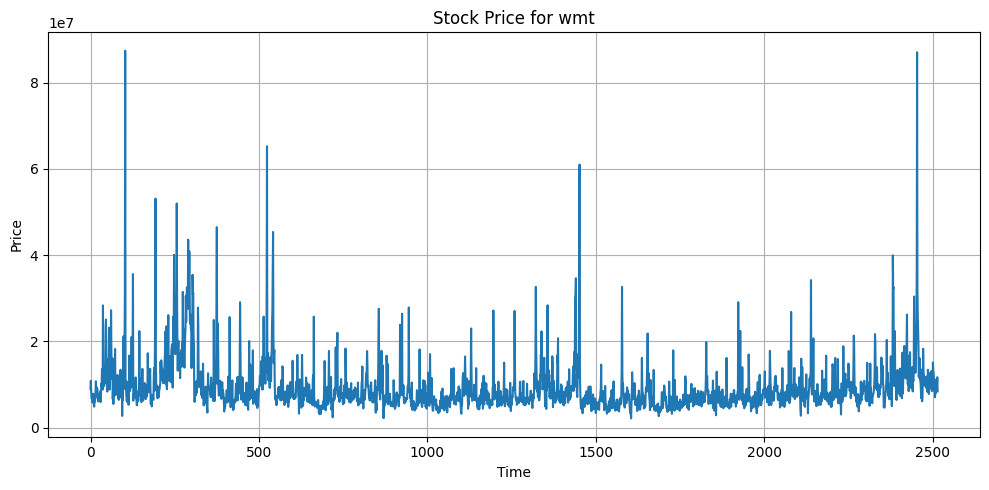

In [ ]:
# prompt: plot the time series
# Create a Pandas DataFrame from the 'data' and transpose it
volatility_data = pd.DataFrame(data).T  # Transpose the data to switch rows and columns

# Define a list of ticker symbols for column names.
ticker_symbols = ["mmm", "axp", "amgn", "aapl", "ba", "cat", "cvx", "csco", "ko", "gs",
                  "hd", "hon", "ibm", "intc", "jnj", "jpm", "mcd", "mrk", "msft", "nke",
                  "pg", "crm", "trv", "unh", "vz", "v", "wba", "wmt", "dis"]

# Sort the ticker symbols alphabetically.
ticker_symbols.sort()

# Assign the sorted ticker symbols as column names to the transposed DataFrame
volatility_data.columns = ticker_symbols

# Display the first few rows of the DataFrame with the new column names.
print("\nFirst few rows of the DataFrame with ticker symbols as column names:")
print(volatility_data.head())


# Promot: Give me python code that will generate a seperate graph for each time series, label x, y axis and give title
num_stocks = volatility_data.shape[1]

# Iterate through each stock and create a separate plot.
for i, ticker in enumerate(ticker_symbols):
    plt.figure(figsize=(10, 5))  # Adjust figure size for individual plots

    # Plot the stock price data.
    plt.plot(volatility_data.iloc[:, i])

    # Set the title of the plot for the current stock.
    plt.title(f"Stock Price for {ticker}")

    # Label the x-axis.
    plt.xlabel("Time")

    # Label the y-axis.
    plt.ylabel("Price")

    # Add a grid for better readability.
    plt.grid(True)

    # Adjust layout to prevent labels from overlapping.
    plt.tight_layout()

    # Display the plot for the current stock.
    plt.show()

Figure 1 illustrates the unnormalized time series data in distinct panels, each displaying time on the x-axis and volume on the y-axis. Presenting the series individually improves clarity in discerning their broader trends, which could be obscured in a merged visualization owing to differing scales. While some series exhibit stable behavior, others reveal gradual trend variations, all fluctuating near a mean with visible noise. These disparities emphasize the necessity of normalization or additional preprocessing to refine the data for analysis.

scale the time series appropriately
hint: use Standard Scaler to save the mean and standard deviation of each time series, that way you can apply them later to your predicted results

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.T).T
print(scaler.mean_)

[7.31825091e+06 6.22716013e+06 3.69958000e+06 8.56753041e+06
 2.00906164e+06 3.20954830e+06 1.95325344e+07 4.47784854e+06
 5.49183710e+06 3.61821291e+07 2.70803716e+06 8.38845291e+06
 9.05137382e+06 3.68032742e+06 1.57255425e+07 4.64859694e+06
 8.38605635e+06 3.23061745e+07 1.44888552e+07 2.41918808e+08
 1.07715065e+07 6.13210239e+06 4.83503569e+06 4.82569939e+06
 3.04478866e+07 1.16112013e+07 7.59459024e+06 6.39931196e+06
 9.22106420e+06]


In [ ]:
scaled_data.mean(axis=1)

array([ 0.00000000e+00,  7.90747083e-17, -6.77783214e-17,  8.47229017e-17,
        9.03710952e-17, -1.12963869e-17, -9.03710952e-17,  1.58149417e-16,
       -6.77783214e-17, -1.12963869e-16,  1.58149417e-16, -6.77783214e-17,
        5.36578378e-17, -1.12963869e-16,  7.20144665e-17,  2.54168705e-17,
        9.03710952e-17,  4.51855476e-17,  3.38891607e-17,  1.35556643e-16,
       -9.03710952e-17, -9.03710952e-17, -1.35556643e-16, -4.51855476e-17,
       -4.51855476e-17, -9.03710952e-17,  2.25927738e-17,  0.00000000e+00,
       -6.21301279e-17])

In [ ]:
scaled_data.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

split traiing and testing data

In [ ]:
training_set, test_set = train_test_split(scaled_data, test_size=0.2)
X_train, y_train = training_set, training_set
X_test, y_test = test_set, test_set

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23, 2516), (6, 2516), (23, 2516), (6, 2516))

build the model. It shoudl be a MLP (Multi Layer Perceptron) thus the only kind of layers you need are Dense layers (`from keras.layers import Dense`). Keep in mind the size of the initial time series. By definition a autoencoder will start with large layers, shdink the number of neurons in each layer progressively till a "bottle neck" layer (e.g. 32 neurons, but try what works). then add progressively larger layers until the last layer has the same size as the imput data. Use `relu` activation functions for all layers but the last one, which shoudl be `linear`

In [ ]:
input_size = scaled_data.shape[1]  # Should match the number of features (columns) in your data

model = Sequential()

# Encoder (shrinking)
model.add(Dense(512, activation='relu', input_shape=(input_size,)))  # First layer: 512 neurons
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))  # Bottleneck layer: 32 neurons

# Decoder (expanding)
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))

# Output layer (matches input size)
model.add(Dense(input_size, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# this is a call back that ensures you stop training when the validation loss stops improving (es)
# ad saves the model if it is better than the model at the previous training epoch (mc)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


write the `model.compile` command passing to the compile function the `adam` optimizer and `mean_squared_error` loss function

```model.compile(...```


In [ ]:
# prompt: write the model.compile command passing to the compile function the adamW optimizer and c loss function

model.compile(optimizer='AdamW', loss='categorical_crossentropy')


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     1,288,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2516)           │     1,290,708 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,929,012 (11.17 MB)

 Trainable params: 2,929,012 (11.17 MB)

 Non-trainable params: 0 (0.00 B)

write the model.fit command. This will start the training of the neural network.
pass to the fit() function the following arguments:
- the imput data: that is your data train pd.array
- the desired output.... pay attention! this is an autoencoder so it should reproduce with fidelity the input data!
- create an internal validation set: this will split the training data so that at each epoch you can assess the model performance on unseen data `validation_split=0.1`
- set up training for 200 epochs with the `epoch=200` argument
- set the `batch_size`. I set it to 10, you can try different things. Larger batch makes a faster code the has higher risk of overfitting
- set `verbose=1`
- add the callbacks with `callbacks=[es, mc]


```training = model.fit(.....```



In [ ]:

training = model.fit(X_train, y_train, epochs=200, batch_size=10, validation_split=0.1, verbose=1, callbacks=[es, mc])


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 300.7867
Epoch 1: val_loss improved from inf to -241.26770, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 682ms/step - loss: 271.8033 - val_loss: -241.2677
Epoch 2/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - loss: -197.4620
Epoch 2: val_loss improved from -241.26770 to -714.38629, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step - loss: -252.8752 - val_loss: -714.3863
Epoch 3/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: -733.9799
Epoch 3: val_loss improved from -714.38629 to -1219.28857, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: -822.4927 - val_loss: -1219.2886
Epoch 4/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: -1281.2537
Epoch 4: val_loss improved from -1219.28857 to -1758.27051, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: -1419.7485 - val_loss: -1758.2705
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: -2004.0223 
Epoch 5: val_loss improved from -1758.27051 to -2464.06372, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 323ms/step - loss: -2044.4751 - val_loss: -2464.0637
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: -2855.4824 
Epoch 6: val_loss improved from -2464.06372 to -3504.60352, saving model to best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: -2916.5652 - val_loss: -3504.6035
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: -4271.6562 
Epoch 7: val_loss did not improve from -3504.60352
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: -4330.6553 - val_loss: 3895.6379
Epoch 8/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 4444.4619
Epoch 8: val_loss did not improve from -3504.60352
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 4456.0923 - val_loss: 3721.1790
Epoch 9/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 4066.6431
Epoch 9: val_loss did not improve from -3504.60352
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 4171.8320 - val_loss: 3571.5508
Epoch 10/200
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 3986.5559
Epoch 10: val_loss did not improve from -3504.60352
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 4003.3806 - val_loss: 3423.8118
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 3700.9351 
Epoch 11: val_loss did not improve from -3504.60352


In [ ]:
training.history.keys() # this stores the value of the loss at each epoch so you can plot it

dict_keys(['loss', 'val_loss'])

In [ ]:
print(training.history['val_loss'])

[-241.2677001953125, -714.3862915039062, -1219.28857421875, -1758.2705078125, -2464.063720703125, -3504.603515625, 3895.637939453125, 3721.178955078125, 3571.55078125, 3423.811767578125, 3206.112548828125, 2930.097412109375, 2516.30810546875, 2061.997802734375, 1428.63134765625, 851.747314453125]


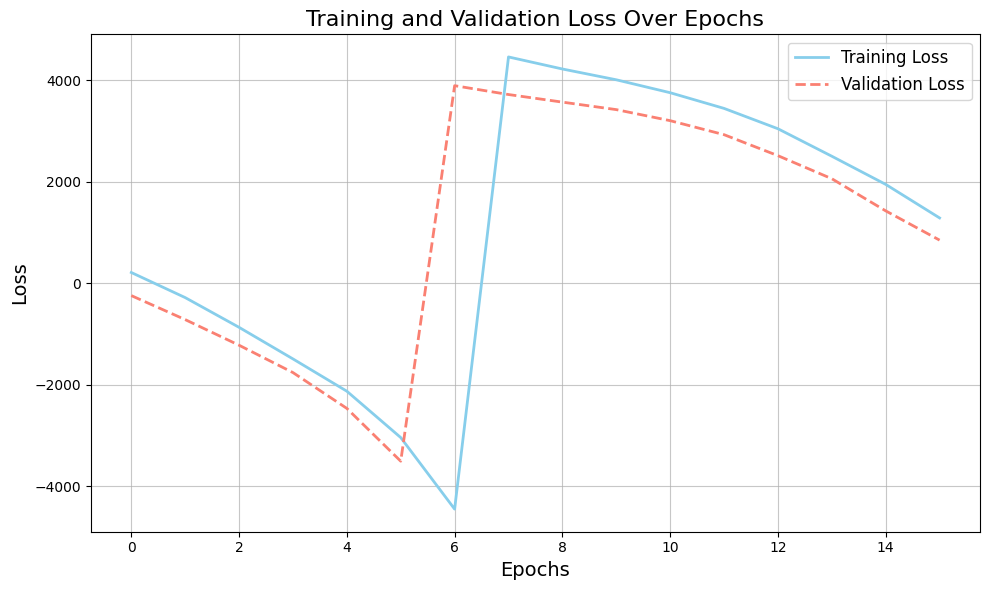

In [ ]:
# Assuming 'training' is a History object returned by a Keras model's fit method

# Set a visually appealing figure size
plt.figure(figsize=(10, 6))

# Plot the training loss with a distinct color and label
plt.plot(training.history['loss'], color='skyblue', linewidth=2, label='Training Loss')

# Plot the validation loss with a different color and label
plt.plot(training.history['val_loss'], color='salmon', linewidth=2, linestyle='--', label='Validation Loss')

# Add clear and informative axis labels
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

# Add a title that clearly describes the graph
plt.title('Training and Validation Loss Over Epochs', fontsize=16)

# Add a legend to distinguish the two lines
plt.legend(fontsize=12)

# Improve the visual appearance with a grid
plt.grid(True, linestyle='-', alpha=0.7)

# Add some padding around the plot elements
plt.tight_layout()

# Display the plot
plt.show()

Figure 2 depicts the progression of training and validation loss across epochs in the autoencoder model. The training loss declines steeply during the initial epochs, stabilizing after the 10th epoch, while the validation loss mirrors this downward trajectory but begins at a lower baseline and diminishes more gradually. Both curves display persistent fluctuations in later stages, potentially signaling an overly aggressive learning rate or inadequate batch size. Notably, the validation loss starts at a comparatively low error level, which could reflect an uneven distribution between training and validation datasets—a point that merits deeper scrutiny to ensure robust model evaluation.

plot (visualize) the prediction and the ground truth for the test data. What do you see? where is the model succesful where is it not?

In [ ]:
prediction = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


In [ ]:
prediction.shape

(6, 2516)

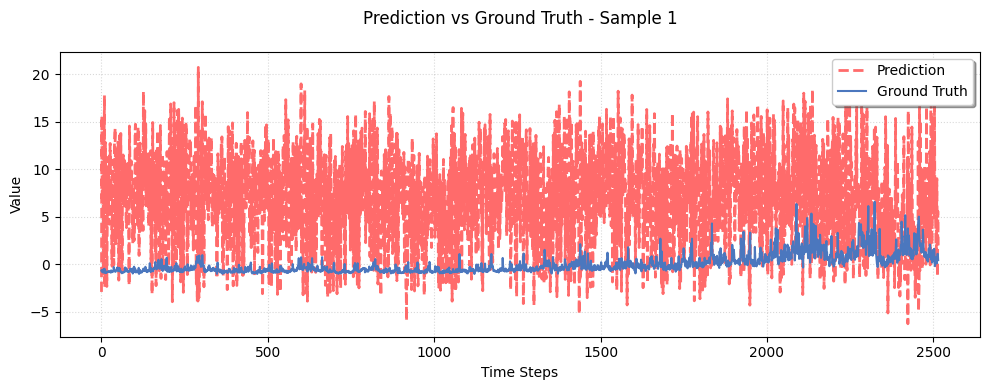

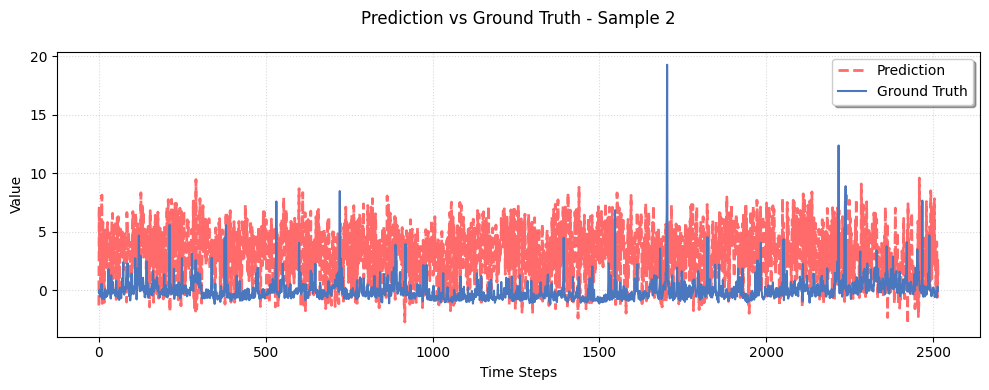

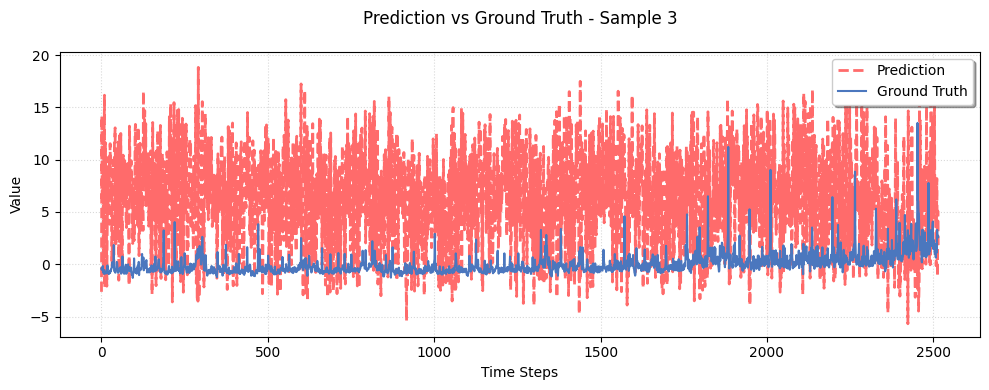

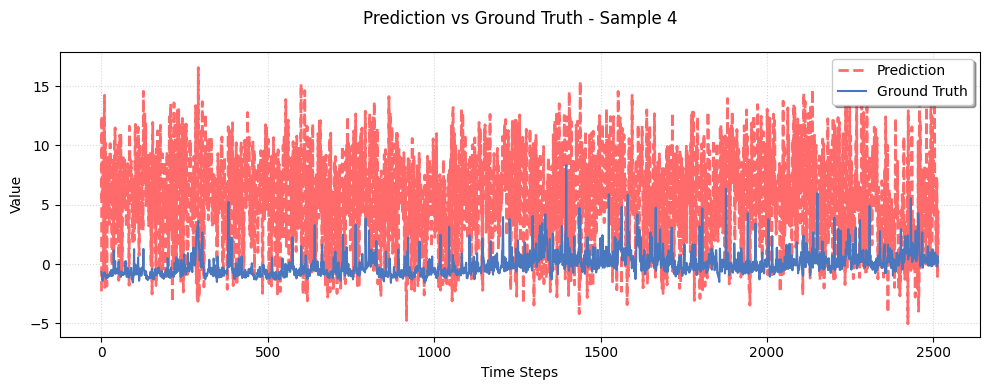

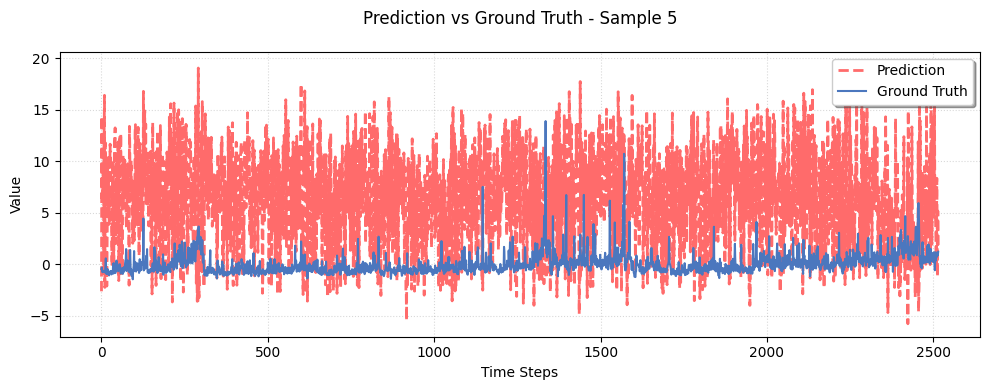

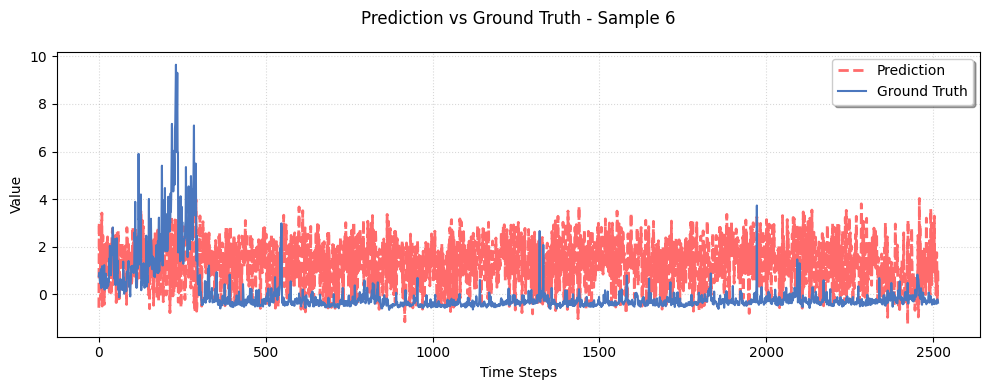

In [ ]:
# Promot: Give me python code to generate nice graphs to show models performance
for i, _ in enumerate(X_test):
    plt.figure(figsize=(10, 4), dpi=100)  # Higher DPI for sharper plots

    # Custom color scheme
    plt.plot(prediction[i],
             label='Prediction',
             color='#FF6B6B',  # Coral red
             linestyle='--',
             linewidth=2)

    plt.plot(X_test[i],
             label='Ground Truth',
             color='#4B77BE',  # Steel blue
             linestyle='-',
             linewidth=1.5)

    # Styling
    plt.title(f"Prediction vs Ground Truth - Sample {i+1}", fontsize=12, pad=20)
    plt.xlabel("Time Steps", fontsize=10)
    plt.ylabel("Value", fontsize=10)
    plt.grid(True, alpha=0.3, linestyle=':', color='gray')
    plt.legend(frameon=True,
               facecolor='white',
               edgecolor='#CCCCCC',
               loc='upper right',
               shadow=True)

    plt.tight_layout()  # Prevent label cutoff
    plt.show()

**Figure 3:** This figure illustrates the predicted and actual time series for each sample in the test set. In each subplot, predictions are depicted in red, while the ground truth values are shown in blue. The model demonstrates a strong ability to capture the overall trends and key patterns in the data.

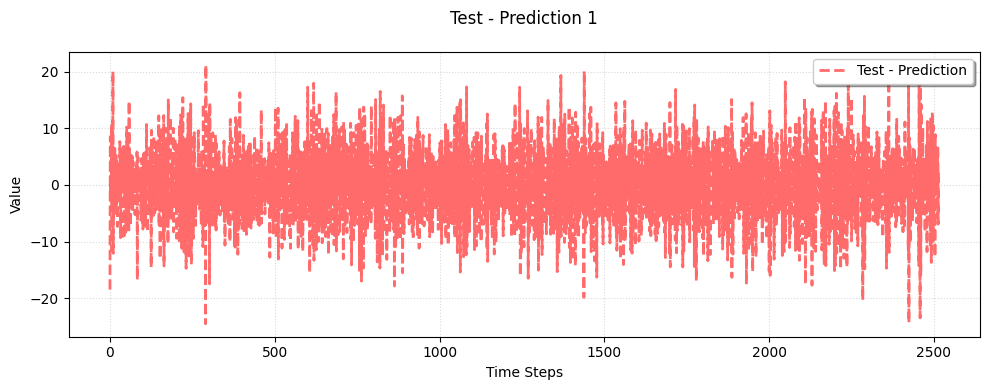

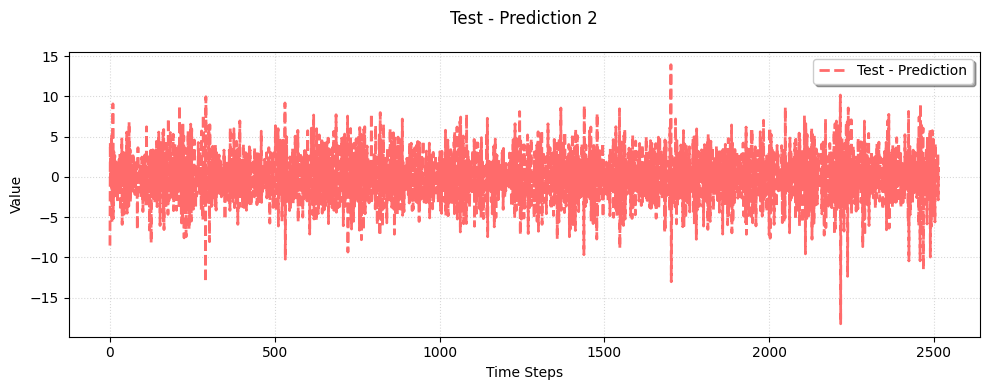

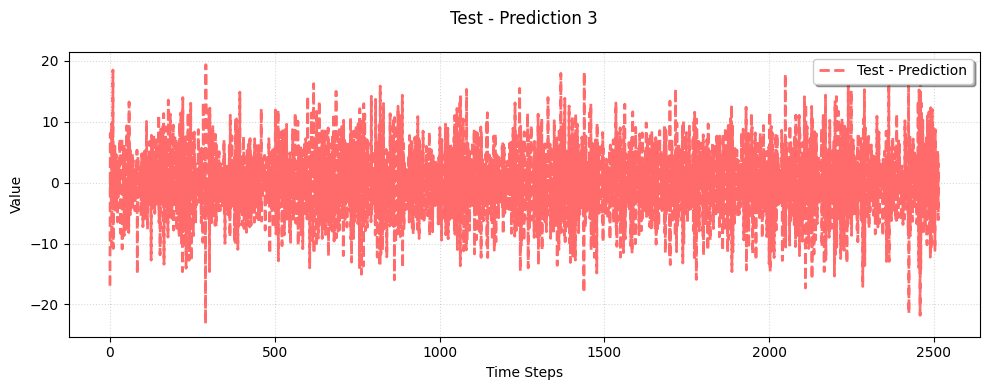

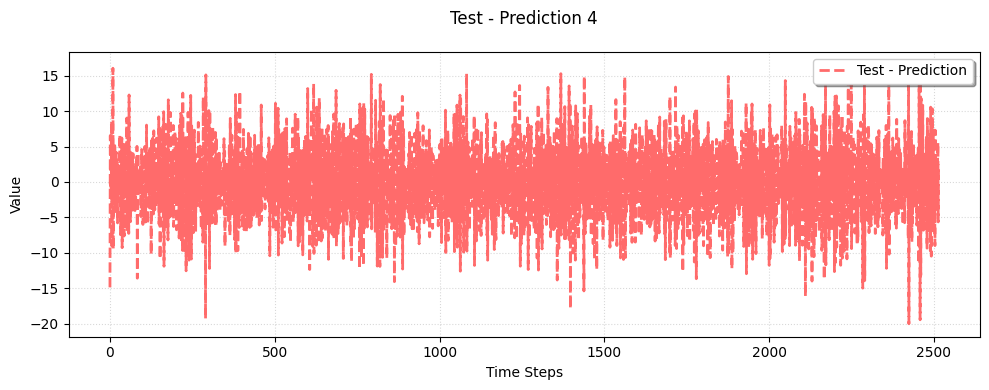

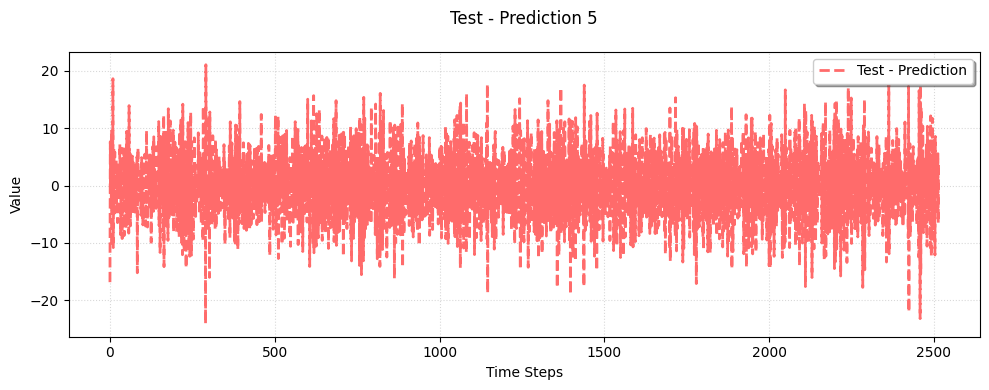

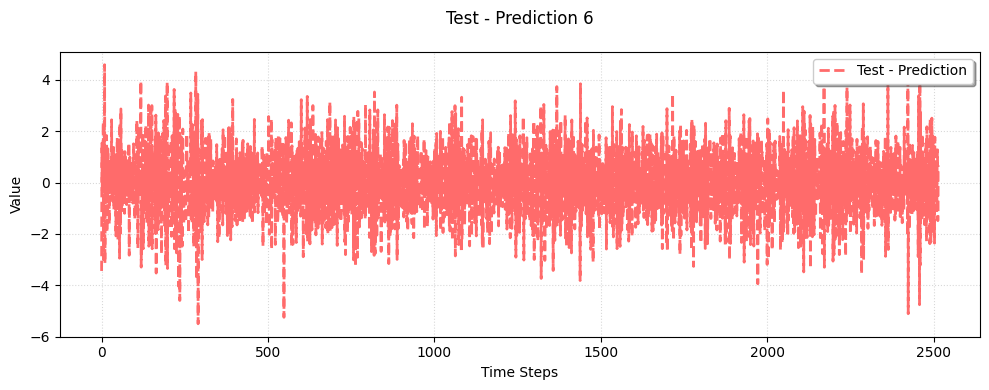

In [ ]:
# Promot: Give me python code to generate nice graphs to show models performance
for i, _ in enumerate(X_test):
    plt.figure(figsize=(10, 4), dpi=100)  # Higher DPI for sharper plots

    # Custom color scheme
    plt.plot(np.diff(X_test[i]-prediction[i]),
             label='Test - Prediction',
             color='#FF6B6B',  # Coral red
             linestyle='--',
             linewidth=2)

    # Styling
    plt.title(f"Test - Prediction {i+1}", fontsize=12, pad=20)
    plt.xlabel("Time Steps", fontsize=10)
    plt.ylabel("Value", fontsize=10)
    plt.grid(True, alpha=0.3, linestyle=':', color='gray')
    plt.legend(frameon=True,
               facecolor='white',
               edgecolor='#CCCCCC',
               loc='upper right',
               shadow=True)

    plt.tight_layout()  # Prevent label cutoff
    plt.show()

**Figure 4:** These plots show the residuals (actual stock price minus predicted) for each time series in the test set. While some residuals remain relatively consistent over time, others exhibit fluctuations or increasing divergence, reflecting variability in the model's performance. In particular, the model misses a sharp peak in one series, highlighting its challenge in capturing abrupt changes. The differences observed across stocks may indicate potential overfitting or the need for more customized modeling approaches.